In [1]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM, Dropout
import pickle
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt


## CORe Embeddings

In [2]:
embeddings = np.load('/home/sanjaycollege15/PredictingDiagnoses/Data/ekg_denoised_CORe_embeddings_30k.npy')
labels = np.load('/home/sanjaycollege15/PredictingDiagnoses/Data/ekg_denoised_CORe_labels_30k.npy')


### Train/Dev/Test/Split

In [3]:
train_X, test_X, train_y, test_y = train_test_split(embeddings, labels, test_size=0.20, random_state=42)
del embeddings
del labels

In [4]:
train_X.shape

(24000, 264, 768)

In [5]:
test_X.shape

(6000, 264, 768)

## LSTM Models

### 128 neurons

In [7]:
inputs = tf.keras.layers.Input(shape=(264,768))
LSTM = tf.keras.layers.LSTM(128)(inputs)
classification_out = tf.keras.layers.Dense(4, activation='softmax')(LSTM)

model = tf.keras.models.Model(inputs=inputs, outputs=classification_out)
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              optimizer='adam', 
              metrics=['sparse_categorical_accuracy'])

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 264, 768)]        0         
                                                                 
 lstm (LSTM)                 (None, 128)               459264    
                                                                 
 dense (Dense)               (None, 4)                 516       
                                                                 
Total params: 459,780
Trainable params: 459,780
Non-trainable params: 0
_________________________________________________________________


In [9]:
train = model.fit(train_X, train_y, epochs=20, batch_size=512, validation_split=0.2)


Epoch 1/20
38/38 [==============================] - 62s 2s/step - loss: 1.3974 - sparse_categorical_accuracy: 0.2795 - val_loss: 1.3754 - val_sparse_categorical_accuracy: 0.2915
Epoch 2/20
38/38 [==============================] - 50s 1s/step - loss: 1.3568 - sparse_categorical_accuracy: 0.3202 - val_loss: 1.3665 - val_sparse_categorical_accuracy: 0.3054
Epoch 3/20
38/38 [==============================] - 50s 1s/step - loss: 1.3424 - sparse_categorical_accuracy: 0.3368 - val_loss: 1.3596 - val_sparse_categorical_accuracy: 0.3117
Epoch 4/20
38/38 [==============================] - 49s 1s/step - loss: 1.3291 - sparse_categorical_accuracy: 0.3473 - val_loss: 1.3618 - val_sparse_categorical_accuracy: 0.3331
Epoch 5/20
38/38 [==============================] - 48s 1s/step - loss: 1.3196 - sparse_categorical_accuracy: 0.3601 - val_loss: 1.3693 - val_sparse_categorical_accuracy: 0.3183
Epoch 6/20
38/38 [==============================] - 48s 1s/step - loss: 1.3097 - sparse_categorical_accuracy: 

In [10]:
model.evaluate(test_X, test_y)

188/188 [==============================] - 21s 109ms/step - loss: 1.4802 - sparse_categorical_accuracy: 0.3237


[1.4801760911941528, 0.32366666197776794]

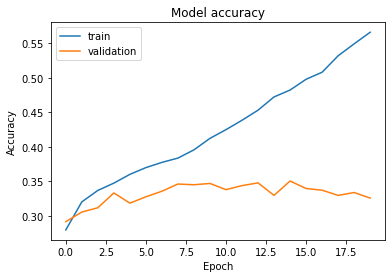

In [12]:
plt.plot(train.history['sparse_categorical_accuracy'])
plt.plot(train.history['val_sparse_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [14]:
print(f"Highest model accuracy is {round(max(train.history['val_sparse_categorical_accuracy'])*100,2)}% \
which occurs at {train.history['val_sparse_categorical_accuracy'].index(max(train.history['val_sparse_categorical_accuracy']))} \
epochs.")
     

Highest model accuracy is 35.04% which occurs at 14 epochs.


---

### 32 neurons, batch_size = 32

In [6]:
inputs = tf.keras.layers.Input(shape=(264,768))
LSTM = tf.keras.layers.LSTM(32)(inputs)
classification_out = tf.keras.layers.Dense(4, activation='softmax')(LSTM)

model = tf.keras.models.Model(inputs=inputs, outputs=classification_out)
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              optimizer='adam', 
              metrics=['sparse_categorical_accuracy'])

In [7]:
train = model.fit(train_X, train_y, epochs=20, validation_split=0.2)


Epoch 1/20
600/600 [==============================] - 77s 125ms/step - loss: 1.3791 - sparse_categorical_accuracy: 0.2872 - val_loss: 1.3810 - val_sparse_categorical_accuracy: 0.2715
Epoch 2/20
600/600 [==============================] - 67s 112ms/step - loss: 1.3508 - sparse_categorical_accuracy: 0.3248 - val_loss: 1.3452 - val_sparse_categorical_accuracy: 0.3313
Epoch 3/20
600/600 [==============================] - 67s 112ms/step - loss: 1.3275 - sparse_categorical_accuracy: 0.3506 - val_loss: 1.3350 - val_sparse_categorical_accuracy: 0.3442
Epoch 4/20
600/600 [==============================] - 67s 112ms/step - loss: 1.3140 - sparse_categorical_accuracy: 0.3641 - val_loss: 1.3255 - val_sparse_categorical_accuracy: 0.3548
Epoch 5/20
600/600 [==============================] - 68s 114ms/step - loss: 1.3046 - sparse_categorical_accuracy: 0.3728 - val_loss: 1.3224 - val_sparse_categorical_accuracy: 0.3567
Epoch 6/20
600/600 [==============================] - 77s 128ms/step - loss: 1.2967 -

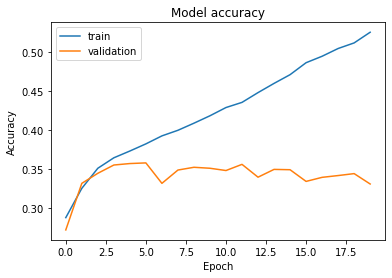

In [9]:
plt.plot(train.history['sparse_categorical_accuracy'])
plt.plot(train.history['val_sparse_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [10]:
print(f"Highest model accuracy is {round(max(train.history['val_sparse_categorical_accuracy'])*100,2)}% \
which occurs at {train.history['val_sparse_categorical_accuracy'].index(max(train.history['val_sparse_categorical_accuracy']))} \
epochs.")
     

Highest model accuracy is 35.75% which occurs at 5 epochs.


Ends up being just ~ as accurate as the model with 128 neurons. Still overfitting, but slightly less than the original.

---

### 10 neurons

In [12]:
inputs = tf.keras.layers.Input(shape=(264,768))
LSTM = tf.keras.layers.LSTM(5)(inputs)
classification_out = tf.keras.layers.Dense(4, activation='softmax')(LSTM)

model = tf.keras.models.Model(inputs=inputs, outputs=classification_out)
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              optimizer='adam', 
              metrics=['sparse_categorical_accuracy'])

In [13]:
train = model.fit(train_X, train_y, epochs=15, validation_split=0.2)

Epoch 1/15
600/600 [==============================] - 61s 100ms/step - loss: 1.3851 - sparse_categorical_accuracy: 0.2698 - val_loss: 1.3815 - val_sparse_categorical_accuracy: 0.2829
Epoch 2/15
600/600 [==============================] - 48s 79ms/step - loss: 1.3754 - sparse_categorical_accuracy: 0.2922 - val_loss: 1.3717 - val_sparse_categorical_accuracy: 0.2979
Epoch 3/15
600/600 [==============================] - 47s 78ms/step - loss: 1.3606 - sparse_categorical_accuracy: 0.3158 - val_loss: 1.3650 - val_sparse_categorical_accuracy: 0.3102
Epoch 4/15
600/600 [==============================] - 47s 78ms/step - loss: 1.3511 - sparse_categorical_accuracy: 0.3277 - val_loss: 1.3623 - val_sparse_categorical_accuracy: 0.3125
Epoch 5/15
600/600 [==============================] - 47s 78ms/step - loss: 1.3420 - sparse_categorical_accuracy: 0.3393 - val_loss: 1.3584 - val_sparse_categorical_accuracy: 0.3154
Epoch 6/15
600/600 [==============================] - 50s 83ms/step - loss: 1.3374 - spar

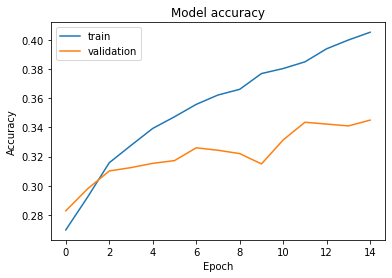

In [14]:
plt.plot(train.history['sparse_categorical_accuracy'])
plt.plot(train.history['val_sparse_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### Multiple LSTM layers stacked on top of one another

In [2]:
inputs = tf.keras.layers.Input(shape=(264,768))
LSTM1 = tf.keras.layers.LSTM(20, return_sequences=True)(inputs)
LSTM2 = tf.keras.layers.LSTM(20)(LSTM1)
classification_out = tf.keras.layers.Dense(4, activation='softmax')(LSTM2)

model = tf.keras.models.Model(inputs=inputs, outputs=classification_out)
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              optimizer='adam', 
              metrics=['sparse_categorical_accuracy'])

In [3]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 264, 768)]        0         
                                                                 
 lstm (LSTM)                 (None, 264, 20)           63120     
                                                                 
 lstm_1 (LSTM)               (None, 20)                3280      
                                                                 
 dense (Dense)               (None, 4)                 84        
                                                                 
Total params: 66,484
Trainable params: 66,484
Non-trainable params: 0
_________________________________________________________________


In [7]:
train = model.fit(train_X, train_y, epochs=15, validation_split=0.2)

Epoch 1/15
600/600 [==============================] - 123s 199ms/step - loss: 1.3724 - sparse_categorical_accuracy: 0.2973 - val_loss: 1.3656 - val_sparse_categorical_accuracy: 0.3073
Epoch 2/15
600/600 [==============================] - 106s 176ms/step - loss: 1.3537 - sparse_categorical_accuracy: 0.3232 - val_loss: 1.3542 - val_sparse_categorical_accuracy: 0.3329
Epoch 3/15
600/600 [==============================] - 112s 186ms/step - loss: 1.3435 - sparse_categorical_accuracy: 0.3301 - val_loss: 1.3584 - val_sparse_categorical_accuracy: 0.3333
Epoch 4/15
600/600 [==============================] - 104s 174ms/step - loss: 1.3263 - sparse_categorical_accuracy: 0.3488 - val_loss: 1.3316 - val_sparse_categorical_accuracy: 0.3585
Epoch 5/15
600/600 [==============================] - 107s 179ms/step - loss: 1.3142 - sparse_categorical_accuracy: 0.3602 - val_loss: 1.3263 - val_sparse_categorical_accuracy: 0.3510
Epoch 6/15
600/600 [==============================] - 106s 176ms/step - loss: 1.

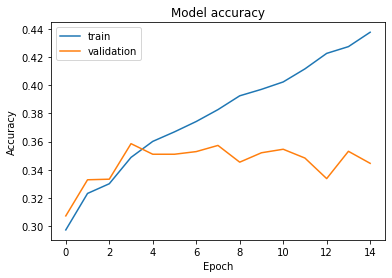

In [8]:
plt.plot(train.history['sparse_categorical_accuracy'])
plt.plot(train.history['val_sparse_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [9]:
print(f"Highest model accuracy is {round(max(train.history['val_sparse_categorical_accuracy'])*100,2)}% \
which occurs at {train.history['val_sparse_categorical_accuracy'].index(max(train.history['val_sparse_categorical_accuracy']))} \
epochs.")
     

Highest model accuracy is 35.85% which occurs at 3 epochs.
